In [1]:
gene0 = [100, 200]
gene1 = [50, 0]
gene2 = [350, 100]
expression_data = [gene0, gene1, gene2]

In [2]:
expression_data[2][0]

350

In [3]:
import numpy as np

array1d = np.array([1, 2, 3, 4])
print(array1d)
print(type(array1d))

[1 2 3 4]
<class 'numpy.ndarray'>


In [4]:
print(array1d.shape)

(4,)


In [5]:
array2d = np.array(expression_data)
print(array2d)
print(array2d.shape)
print(type(array2d))

[[100 200]
 [ 50   0]
 [350 100]]
(3, 2)
<class 'numpy.ndarray'>


In [6]:
import numpy as np

# Create an ndarray of integers in the range
# 0 up to (but not including) 1,000,000
array = np.arange(1e6)

# Convert it to a list
list_array = array.tolist()

In [7]:
%timeit -n10 y = [val * 5 for val in list_array]

46.1 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%timeit -n10 x = array * 5

884 µs ± 331 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
# Create an ndarray x
x = np.array([1, 2, 3], np.int32)
print(x)

[1 2 3]


In [10]:
# Create a "slice" of x
y = x[:2]
print(y)

[1 2]


In [11]:
# Set the first element of y to be 6
y[0] = 6
print(y)

[6 2]


In [12]:
# Now the first element in x has changed to 6!
print(x)

[6 2 3]


In [13]:
y = np.copy(x[:2])

In [14]:
x = np.array([1, 2, 3, 4])
print(x * 2)

[2 4 6 8]


In [15]:
y = np.array([0, 1, 2, 1])
print(x + y)

[1 3 5 5]


In [16]:
x = np.array([1, 2, 3, 4])
x = np.reshape(x, (len(x), 1))
print(x)

[[1]
 [2]
 [3]
 [4]]


In [17]:
y = np.array([0, 1, 2, 1])
y = np.reshape(y, (1, len(y)))
print(y)

[[0 1 2 1]]


In [18]:
print(x.shape)
print(y.shape)

(4, 1)
(1, 4)


In [19]:
outer = x * y
print(outer)

[[0 1 2 1]
 [0 2 4 2]
 [0 3 6 3]
 [0 4 8 4]]


In [22]:
import numpy as np
import pandas as pd

# Import TCGA melanoma data
filename = 'data/counts.txt'
with open(filename, 'rt') as f:
    data_table = pd.read_csv(f, index_col=0) # Parse file with pandas

print(data_table.iloc[:5, :5])

       00624286-41dd-476f-a63b-d2a5f484bb45  TCGA-FS-A1Z0  TCGA-D9-A3Z1  \
A1BG                                1272.36        452.96        288.06   
A1CF                                   0.00          0.00          0.00   
A2BP1                                  0.00          0.00          0.00   
A2LD1                                164.38        552.43        201.83   
A2ML1                                 27.00          0.00          0.00   

       02c76d24-f1d2-4029-95b4-8be3bda8fdbe  TCGA-EB-A51B  
A1BG                                 400.11        420.46  
A1CF                                   1.00          0.00  
A2BP1                                  0.00          1.00  
A2LD1                                165.12         95.75  
A2ML1                                  0.00          8.00  


In [23]:
# Sample names
samples = list(data_table.columns)

In [24]:
# Import gene lengths
filename = 'data/genes.csv'
with open(filename, 'rt') as f:
    # Parse file with pandas, index by GeneSymbol
    gene_info = pd.read_csv(f, index_col=0)
print(gene_info.iloc[:5, :])

            GeneID  GeneLength
GeneSymbol                    
CPA1          1357        1724
GUCY2D        3000        3623
UBC           7316        2687
C11orf95     65998        5581
ANKMY2       57037        2611


In [25]:
print("Genes in data_table: ", data_table.shape[0])
print("Genes in gene_info: ", gene_info.shape[0])

Genes in data_table:  20500
Genes in gene_info:  20503


In [26]:
# Subset gene info to match the count data
matched_index = pd.Index.intersection(data_table.index, gene_info.index)

In [27]:
# 2D ndarray containing expression counts for each gene in each individual
counts = np.asarray(data_table.loc[matched_index], dtype=int)

gene_names = np.array(matched_index)

# Check how many genes and individuals were measured
print(f'{counts.shape[0]} genes measured in {counts.shape[1]} individuals.')

20500 genes measured in 375 individuals.


In [28]:
# 1D ndarray containing the lengths of each gene
gene_lengths = np.asarray(gene_info.loc[matched_index]['GeneLength'],
                          dtype=int)

In [29]:
print(counts.shape)
print(gene_lengths.shape)

(20500, 375)
(20500,)


In [31]:
# Make all plots appear inline in the Jupyter notebook from now onwards
%matplotlib inline
# Use our own style file for the plots
import matplotlib.pyplot as plt
plt.style.use('style/elegant.mplstyle')


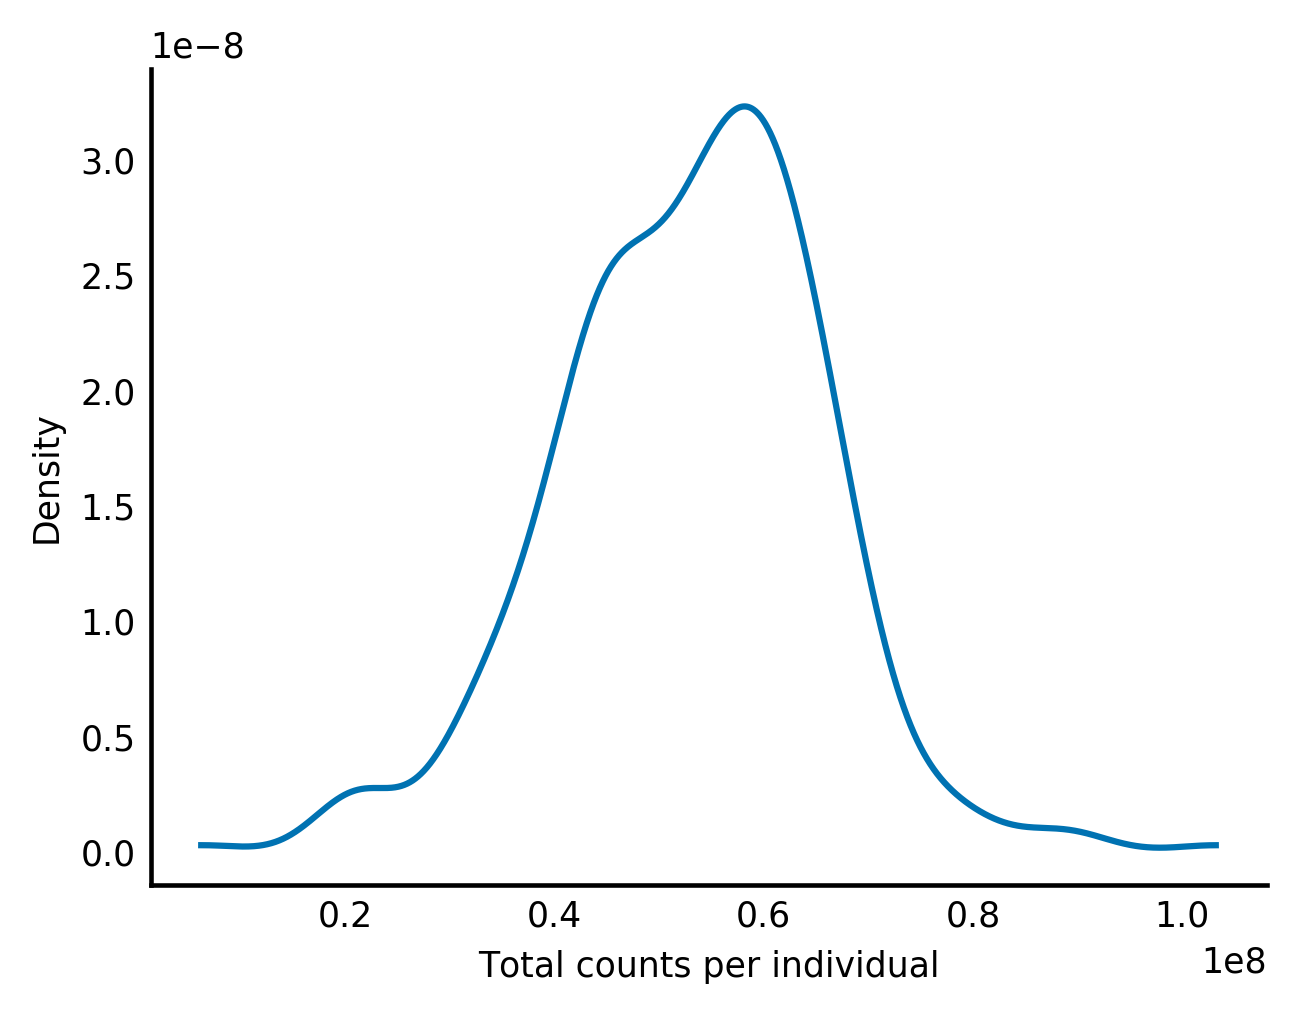

Count statistics:
  min:  6231205
  mean: 52995255.33866667
  max:  103219262


In [32]:
total_counts = np.sum(counts, axis=0)  # sum columns together
                                       # (axis=1 would sum rows)

from scipy import stats

# Use Gaussian smoothing to estimate the density
density = stats.kde.gaussian_kde(total_counts)

# Make values for which to estimate the density, for plotting
x = np.arange(min(total_counts), max(total_counts), 10000)

# Make the density plot
fig, ax = plt.subplots()
ax.plot(x, density(x))
ax.set_xlabel("Total counts per individual")
ax.set_ylabel("Density")

plt.show()

print(f'Count statistics:\n  min:  {np.min(total_counts)}'
      f'\n  mean: {np.mean(total_counts)}'
      f'\n  max:  {np.max(total_counts)}')

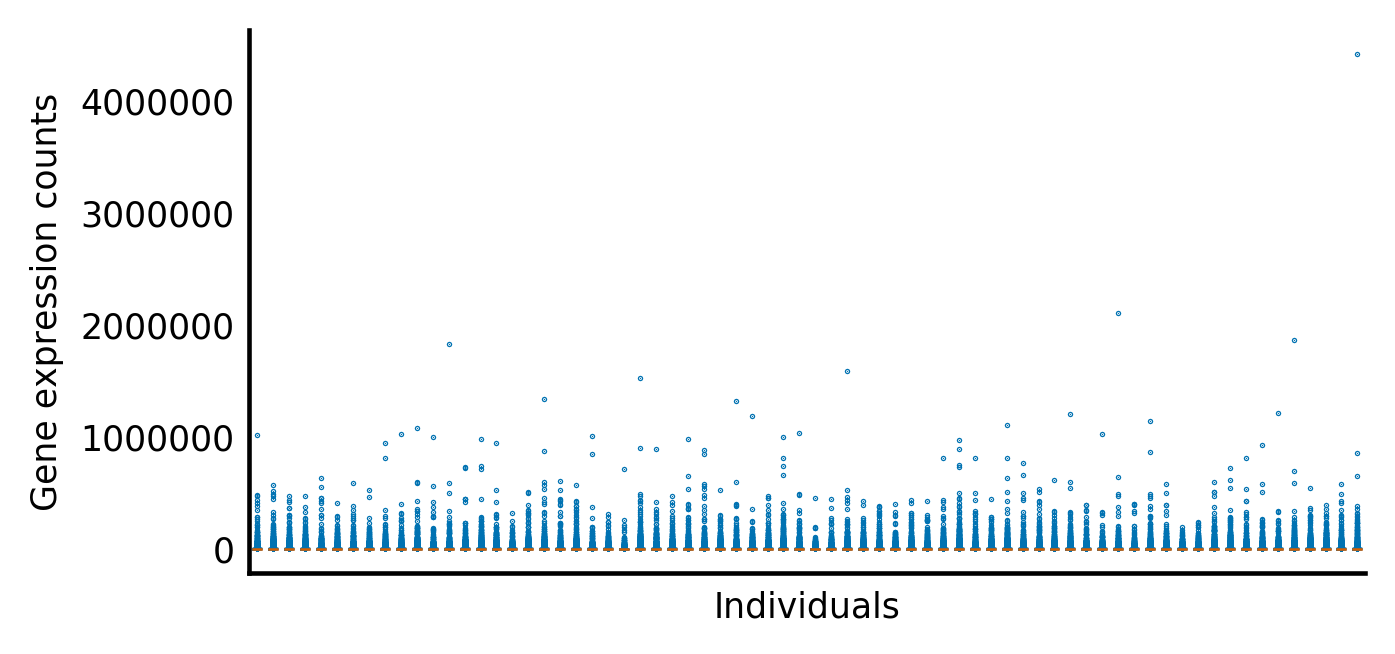

In [34]:
# Subset data for plotting
np.random.seed(seed=7) # Set seed so we will get consistent results
# Randomly select 70 samples
samples_index = np.random.choice(range(counts.shape[1]), size=70, replace=False)
counts_subset = counts[:, samples_index]

# Some custom x-axis labelling to make our plots easier to read
def reduce_xaxis_labels(ax, factor):
    """Show only every ith label to prevent crowding on x-axis
        e.g. factor = 2 would plot every second x-axis label,
        starting at the first.

    Parameters
    ----------
    ax : matplotlib plot axis to be adjusted
    factor : int, factor to reduce the number of x-axis labels by
    """
    plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)

# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(4.8, 2.4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(counts_subset)
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene expression counts")
    reduce_xaxis_labels(ax, 5)

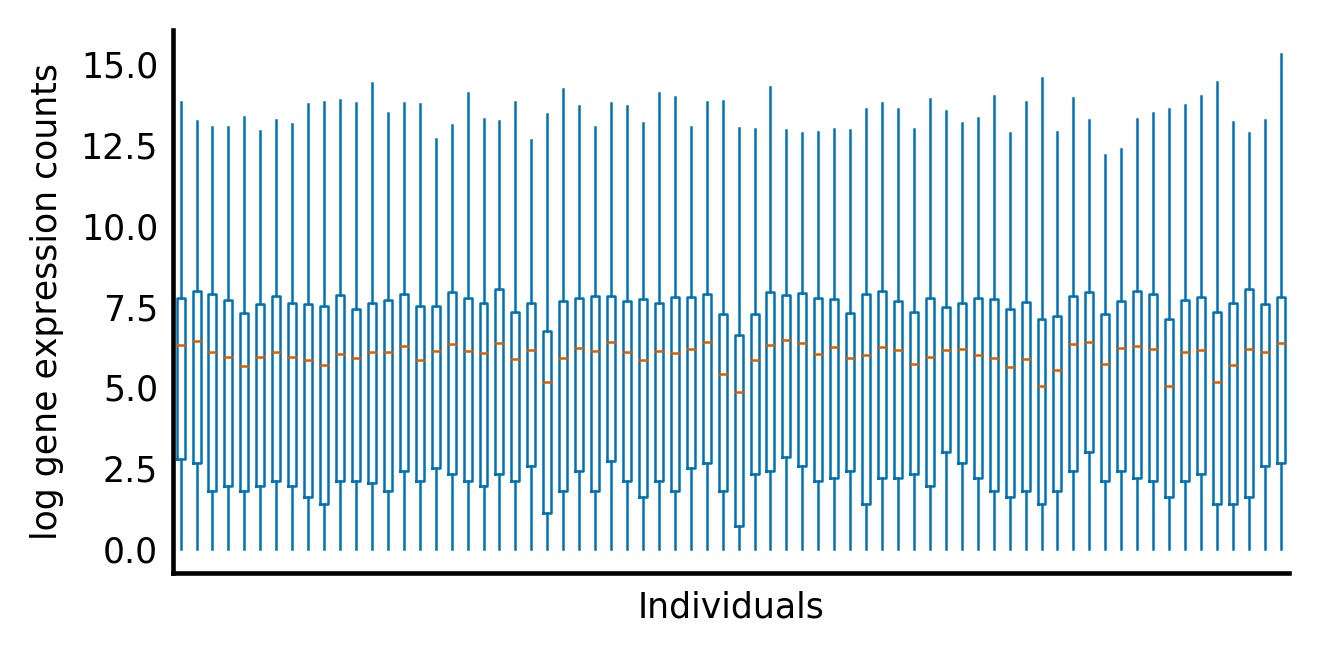

In [35]:
# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(4.8, 2.4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("log gene expression counts")
    reduce_xaxis_labels(ax, 5)

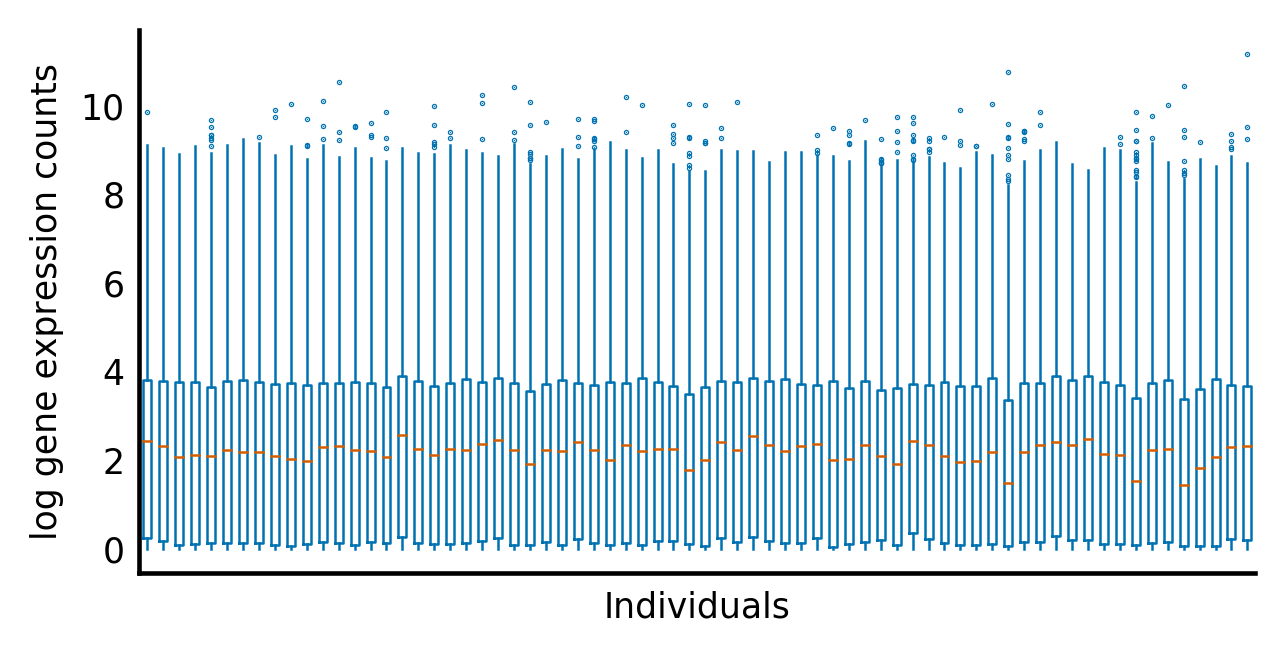

In [36]:
# Normalize by library size
# Divide the expression counts by the total counts for that individual
# Multiply by 1 million to get things back in a similar scale
counts_lib_norm = counts / total_counts * 1000000
# Notice how we just used broadcasting twice there!
counts_subset_lib_norm = counts_lib_norm[:,samples_index]

# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(4.8, 2.4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset_lib_norm + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("log gene expression counts")
    reduce_xaxis_labels(ax, 5)

In [37]:
import itertools as it
from collections import defaultdict


def class_boxplot(data, classes, colors=None, **kwargs):
    """Make a boxplot with boxes colored according to the class they belong to.

    Parameters
    ----------
    data : list of array-like of float
        The input data. One boxplot will be generated for each element
        in `data`.
    classes : list of string, same length as `data`
        The class each distribution in `data` belongs to.

    Other parameters
    ----------------
    kwargs : dict
        Keyword arguments to pass on to `plt.boxplot`.
    """
    all_classes = sorted(set(classes))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    class2color = dict(zip(all_classes, it.cycle(colors)))

    # map classes to data vectors
    # other classes get an empty list at that position for offset
    class2data = defaultdict(list)
    for distrib, cls in zip(data, classes):
        for c in all_classes:
            class2data[c].append([])
        class2data[cls][-1] = distrib

    # then, do each boxplot in turn with the appropriate color
    fig, ax = plt.subplots()
    lines = []
    for cls in all_classes:
        # set color for all elements of the boxplot
        for key in ['boxprops', 'whiskerprops', 'flierprops']:
            kwargs.setdefault(key, {}).update(color=class2color[cls])
        # draw the boxplot
        box = ax.boxplot(class2data[cls], **kwargs)
        lines.append(box['whiskers'][0])
    ax.legend(lines, all_classes)
    return ax

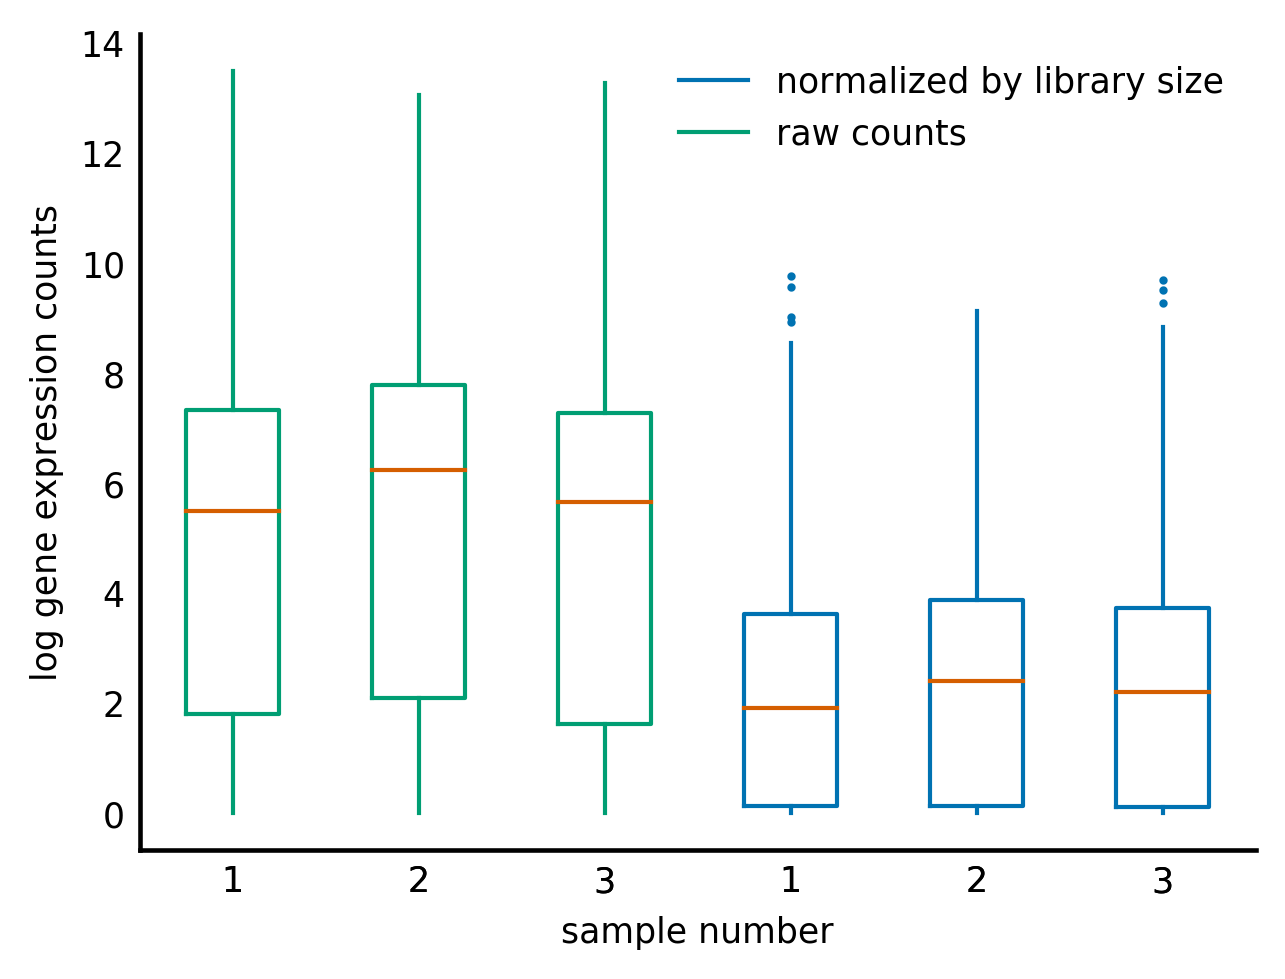

In [38]:
log_counts_3 = list(np.log(counts.T[:3] + 1))
log_ncounts_3 = list(np.log(counts_lib_norm.T[:3] + 1))
ax = class_boxplot(log_counts_3 + log_ncounts_3,
                   ['raw counts'] * 3 + ['normalized by library size'] * 3,
                   labels=[1, 2, 3, 1, 2, 3])
ax.set_xlabel('sample number')
ax.set_ylabel('log gene expression counts');

In [39]:
def binned_boxplot(x, y, *,  # check out this Python 3 exclusive! (*see tip box)
                   xlabel='gene length (log scale)',
                   ylabel='average log counts'):
    """Plot the distribution of `y` dependent on `x` using many boxplots.

    Note: all inputs are expected to be log-scaled.

    Parameters
    ----------
    x: 1D array of float
        Independent variable values.
    y: 1D array of float
        Dependent variable values.
    """
    # Define bins of `x` depending on density of observations
    x_hist, x_bins = np.histogram(x, bins='auto')

    # Use `np.digitize` to number the bins
    # Discard the last bin edge because it breaks the right-open assumption
    # of `digitize`. The max observation correctly goes into the last bin.
    x_bin_idxs = np.digitize(x, x_bins[:-1])

    # Use those indices to create a list of arrays, each containing the `y`
    # values corresponding to `x`s in that bin. This is the input format
    # expected by `plt.boxplot`
    binned_y = [y[x_bin_idxs == i]
                for i in range(np.max(x_bin_idxs))]
    fig, ax = plt.subplots(figsize=(4.8,1))

    # Make the x-axis labels using the bin centers
    x_bin_centers = (x_bins[1:] + x_bins[:-1]) / 2
    x_ticklabels = np.round(np.exp(x_bin_centers)).astype(int)

    # make the boxplot
    ax.boxplot(binned_y, labels=x_ticklabels)

    # show only every 10th label to prevent crowding on x-axis
    reduce_xaxis_labels(ax, 10)

    # Adjust the axis names
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);

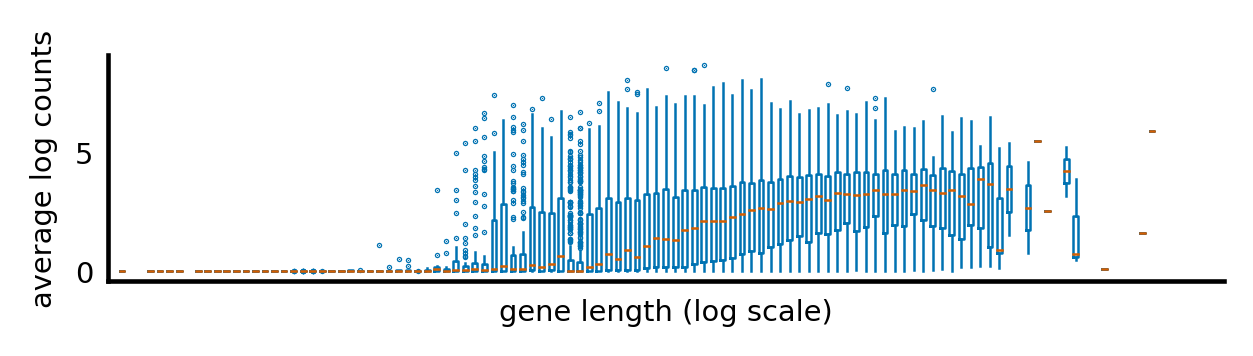

In [40]:

log_counts = np.log(counts_lib_norm + 1)
mean_log_counts = np.mean(log_counts, axis=1)  # across samples
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('style/thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts)

In [41]:
# Make our variable names the same as the RPKM formula so we can compare easily
C = counts
N = counts.sum(axis=0)  # sum each column to get total reads per sample
L = gene_lengths  # lengths for each gene, matching rows in `C`

In [42]:
# Multiply all counts by 10^9
C_tmp = 10^9 * C

In [43]:
print('C_tmp.shape', C_tmp.shape)
print('L.shape', L.shape)

C_tmp.shape (20500, 375)
L.shape (20500,)


In [44]:
L = L[:, np.newaxis] # append a dimension to L, with value 1
print('C_tmp.shape', C_tmp.shape)
print('L.shape', L.shape)

C_tmp.shape (20500, 375)
L.shape (20500, 1)


In [45]:
# Divide each row by the gene length for that gene (L)
C_tmp = C_tmp / L

In [46]:
N = counts.sum(axis=0) # sum each column to get total reads per sample

# Check the shapes of C_tmp and N
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

C_tmp.shape (20500, 375)
N.shape (375,)


In [48]:
# Divide each column by the total counts for that column (N)
N = N[np.newaxis, :]
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

C_tmp.shape (20500, 375)
N.shape (1, 1, 375)


In [49]:
# Divide each column by the total counts for that column (N)
N = N[np.newaxis, :]
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

C_tmp.shape (20500, 375)
N.shape (1, 1, 1, 375)


In [51]:
def rpkm(counts, lengths):
    """Calculate reads per kilobase transcript per million reads.

    RPKM = (10^9 * C) / (N * L)

    Where:
    C = Number of reads mapped to a gene
    N = Total mapped reads in the experiment
    L = Exon length in base pairs for a gene

    Parameters
    ----------
    counts: array, shape (N_genes, N_samples)
        RNAseq (or similar) count data where columns are individual samples
        and rows are genes.
    lengths: array, shape (N_genes,)
        Gene lengths in base pairs in the same order
        as the rows in counts.

    Returns
    -------
    normed : array, shape (N_genes, N_samples)
        The RPKM normalized counts matrix.
    """
    N = np.sum(counts, axis=0)  # sum each column to get total reads per sample
    L = lengths
    C = counts

    normed = 1e9 * C / (N[np.newaxis, :] * L[:, np.newaxis])

    return normed

counts_rpkm = rpkm(counts, gene_lengths)

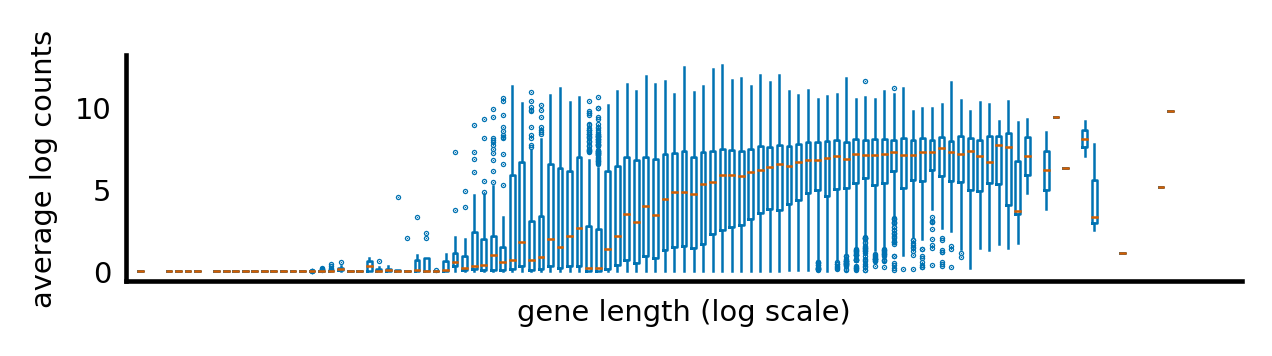

In [52]:
log_counts = np.log(counts + 1)
mean_log_counts = np.mean(log_counts, axis=1)
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('style/thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts)


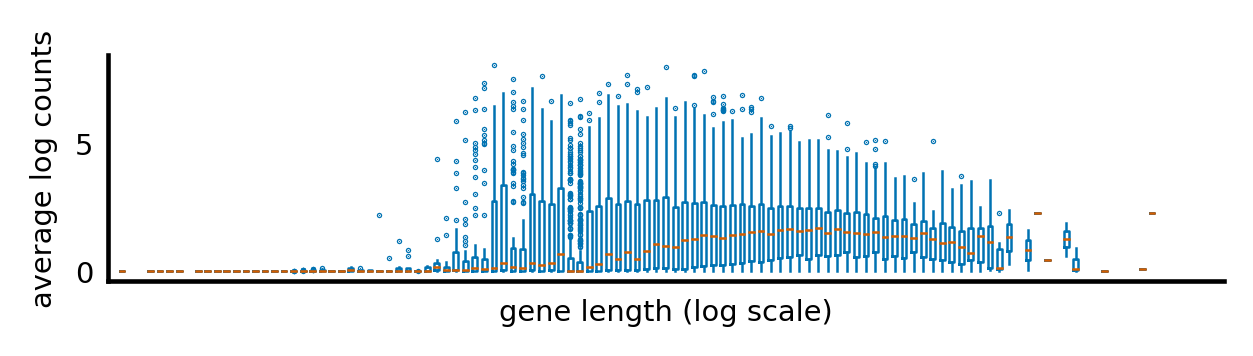

In [53]:
log_counts = np.log(counts_rpkm + 1)
mean_log_counts = np.mean(log_counts, axis=1)
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('style/thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts)


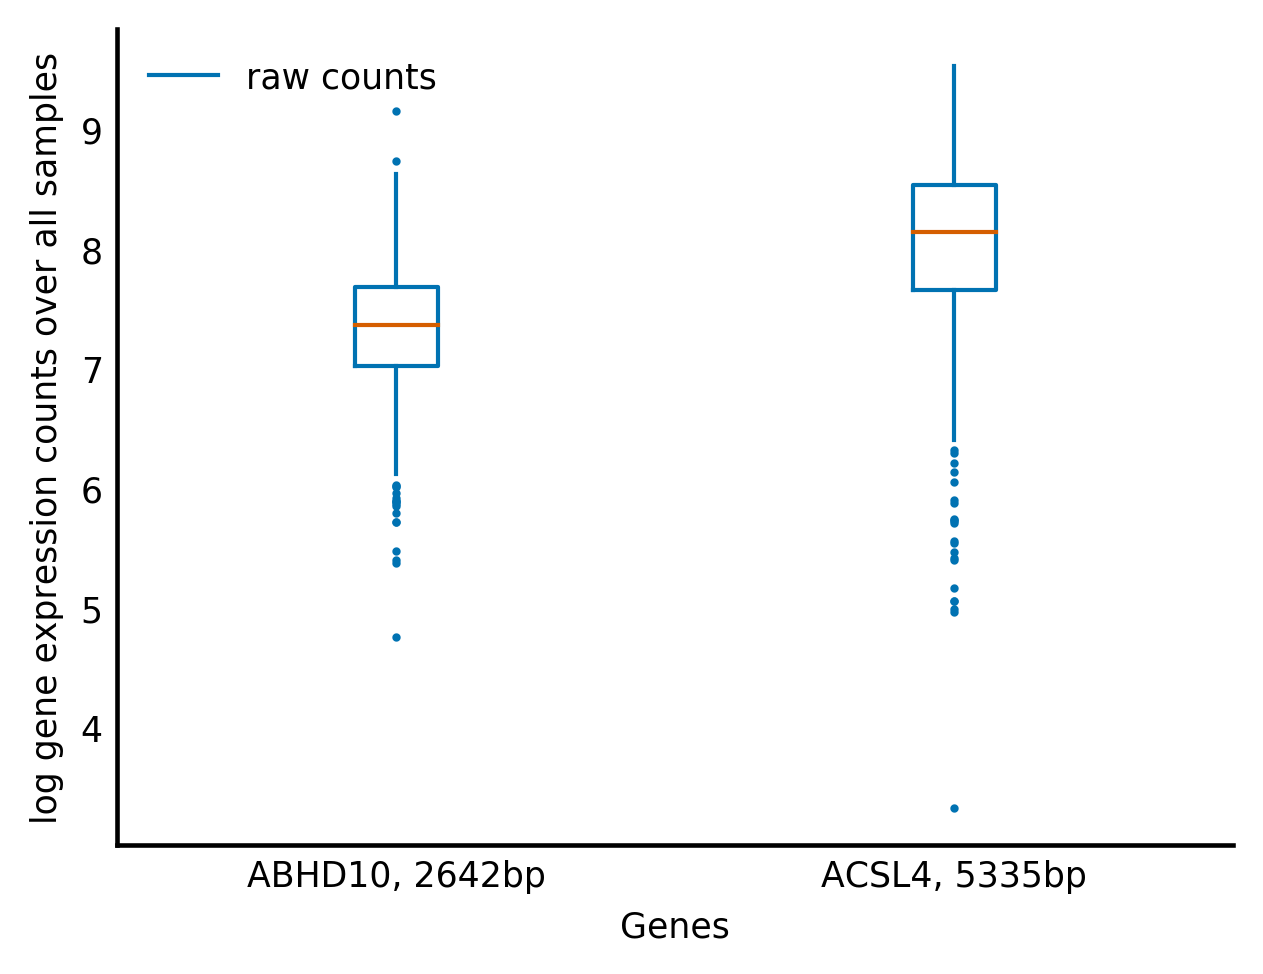

In [54]:
gene_idxs = np.array([80, 186])
gene1, gene2 = gene_names[gene_idxs]
len1, len2 = gene_lengths[gene_idxs]
gene_labels = [f'{gene1}, {len1}bp', f'{gene2}, {len2}bp']

log_counts = list(np.log(counts[gene_idxs] + 1))
log_ncounts = list(np.log(counts_rpkm[gene_idxs] + 1))
ax = class_boxplot(log_counts,
                   ['raw counts'] * 3,
                   labels=gene_labels)
ax.set_xlabel('Genes')
ax.set_ylabel('log gene expression counts over all samples');

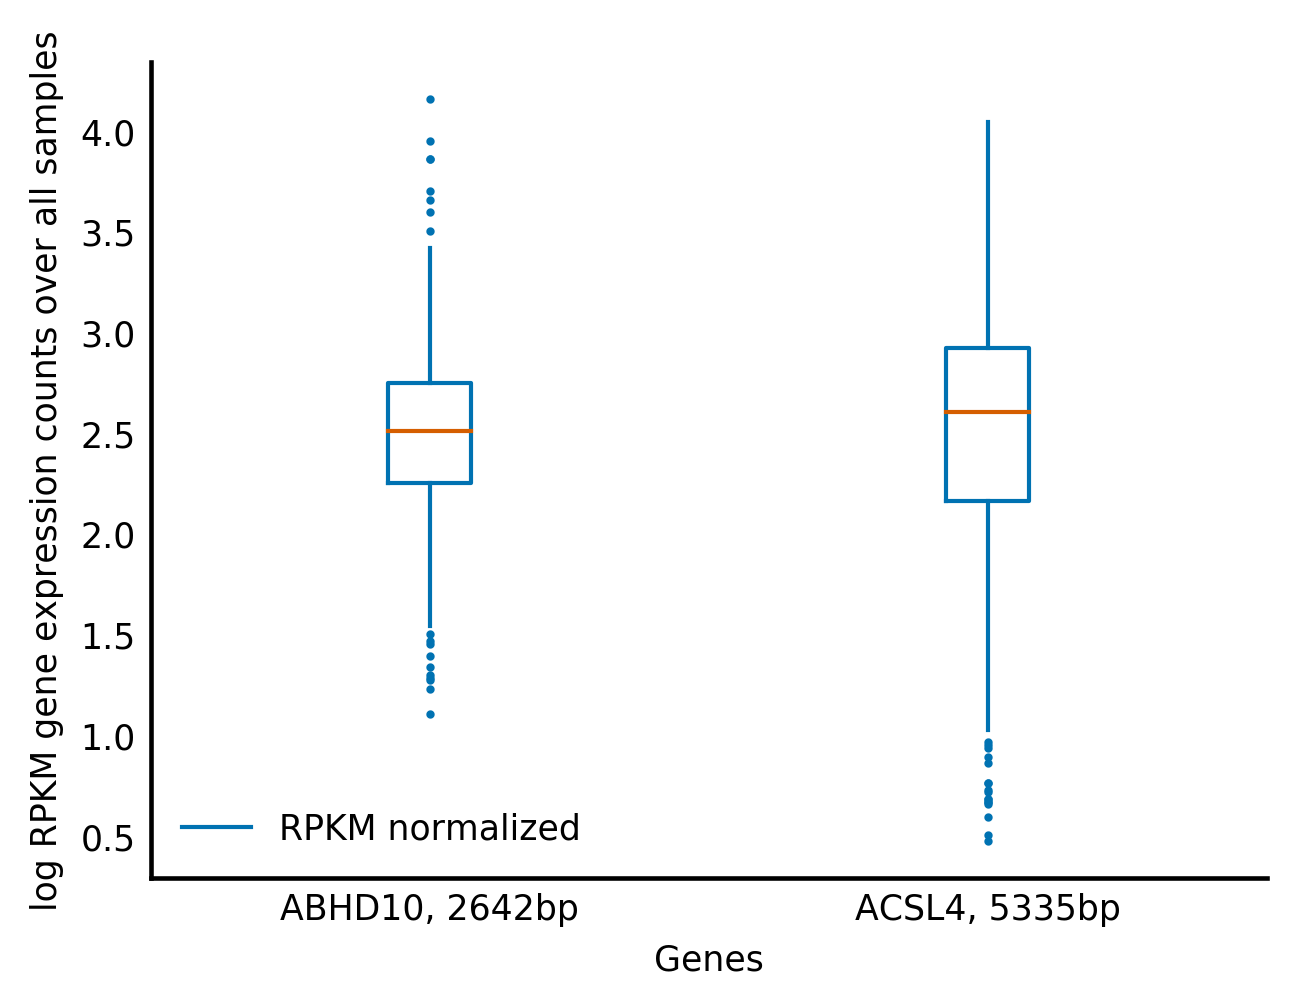

In [55]:
ax = class_boxplot(log_ncounts,
                   ['RPKM normalized'] * 3,
                   labels=gene_labels)
ax.set_xlabel('Genes')
ax.set_ylabel('log RPKM gene expression counts over all samples');